In [27]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load data

path_2022 = "../data/movilidad_provincias_2022.csv"
path_2023 = "../data/movilidad_provincias_2023.csv"
path_2024 = "../data/movilidad_provincias_2024.csv"

original_data_2022 = pd.read_csv(path_2022, sep=",")
original_data_2023 = pd.read_csv(path_2023, sep=",")
original_data_2024 = pd.read_csv(path_2024, sep=",")

df_2022 = original_data_2022.copy()
df_2023 = original_data_2023.copy()
df_2024 = original_data_2024.copy()

### 2.1 Exploratory Data Analysis

### 2.1 Dataset Exploratory Data Analysis (EDA)

Top 20 dates with highest mobility:
           day  viajeros
220 2023-04-09   7293318
239 2023-04-28   6788326
344 2023-08-11   6750901
330 2023-07-28   6623688
217 2023-04-06   6584170
216 2023-04-05   6548348
316 2023-07-14   6514709
221 2023-04-10   6513253
700 2024-08-02   6489150
340 2023-08-07   6464723
409 2023-10-15   6445991
337 2023-08-04   6444981
707 2024-08-09   6432469
695 2024-07-28   6405283
332 2023-07-30   6403919
721 2024-08-23   6402258
57  2022-10-28   6387845
716 2024-08-18   6386600
686 2024-07-19   6347034
333 2023-07-31   6343800
Mobility details for top dates:
             day provincia_origen_name provincia_destino_name  viajeros
0     2022-10-28              Albacete               Alicante     21511
1     2022-10-28              Albacete                Almería       482
2     2022-10-28              Albacete               Asturias        33
3     2022-10-28              Albacete                Badajoz       186
4     2022-10-28              Albacete         

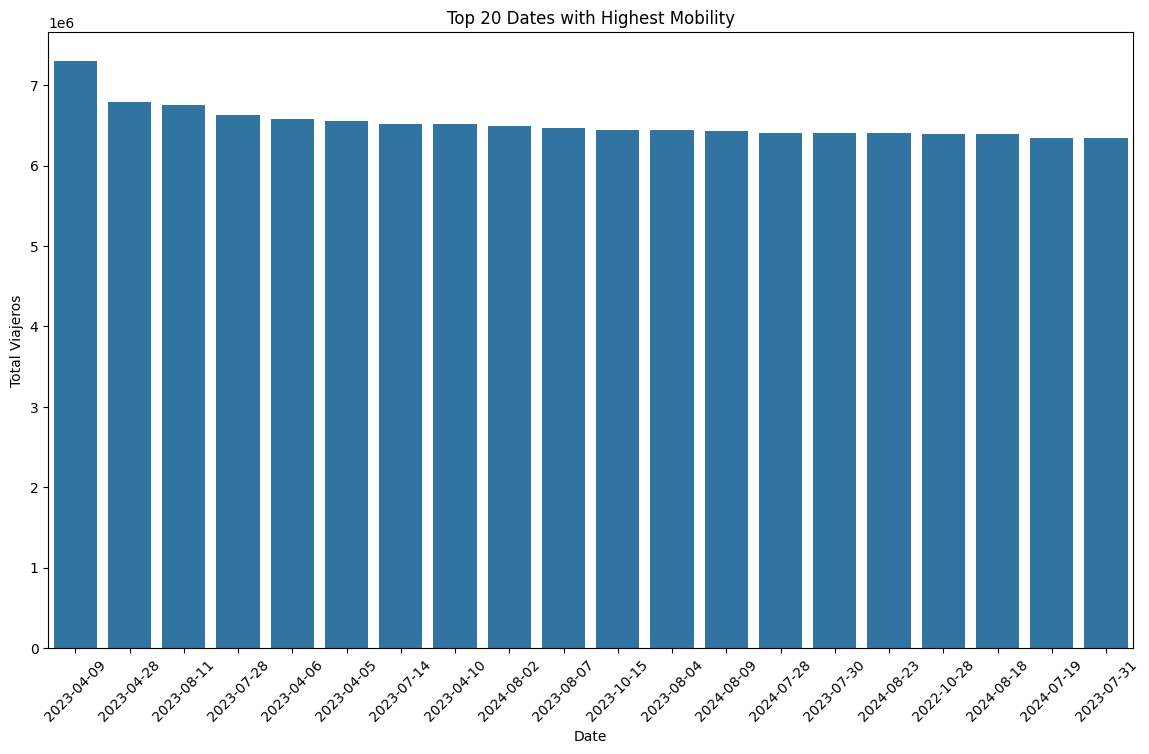

In [29]:
########Finding the top 20 dates with the highest mobility#############################################
df_2022['day'] = pd.to_datetime(df_2022['day'])
df_2023['day'] = pd.to_datetime(df_2023['day'])
df_2024['day'] = pd.to_datetime(df_2024['day'])
#combine data from all years
df_all = pd.concat([df_2022, df_2023, df_2024])
#Aggregate data to find total numb of travelers for each date
daily_mobility = df_all.groupby('day')['viajeros'].sum().reset_index()
#identify the dates with the highest mobility
top_mobility_dates = daily_mobility.sort_values(by='viajeros', ascending=False).head(20)
print("Top 20 dates with highest mobility:")
print(top_mobility_dates)
#Analyze the origin and destination locations for these dates
top_dates = top_mobility_dates['day'].tolist()
top_dates_data = df_all[df_all['day'].isin(top_dates)]
#Group by date, origin, and destination to find the total number of travelers
location_mobility = top_dates_data.groupby(['day', 'provincia_origen_name', 'provincia_destino_name'])['viajeros'].sum().reset_index()
#prints
print("Mobility details for top dates:")
print(location_mobility)
#Plots
plt.figure(figsize=(14, 8))
sns.barplot(x='day', y='viajeros', data=top_mobility_dates)
plt.title('Top 20 Dates with Highest Mobility')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=45)
plt.show()

Top 3 destinations for top 20 dates with highest mobility:
            day provincia_destino_name  viajeros
29   2022-10-28                 Madrid    435422
46   2022-10-28                 Toledo    329955
7    2022-10-28              Barcelona    293052
81   2023-04-05                 Madrid    392341
59   2023-04-05              Barcelona    326776
98   2023-04-05                 Toledo    317840
133  2023-04-06                 Madrid    351090
111  2023-04-06              Barcelona    313319
148  2023-04-06              Tarragona    281336
185  2023-04-09                 Madrid    899781
163  2023-04-09              Barcelona    548078
202  2023-04-09                 Toledo    342879
237  2023-04-10                 Madrid    663939
215  2023-04-10              Barcelona    577507
255  2023-04-10      Valencia/Valéncia    298143
289  2023-04-28                 Madrid    429117
306  2023-04-28                 Toledo    362579
267  2023-04-28              Barcelona    327376
341  2023-

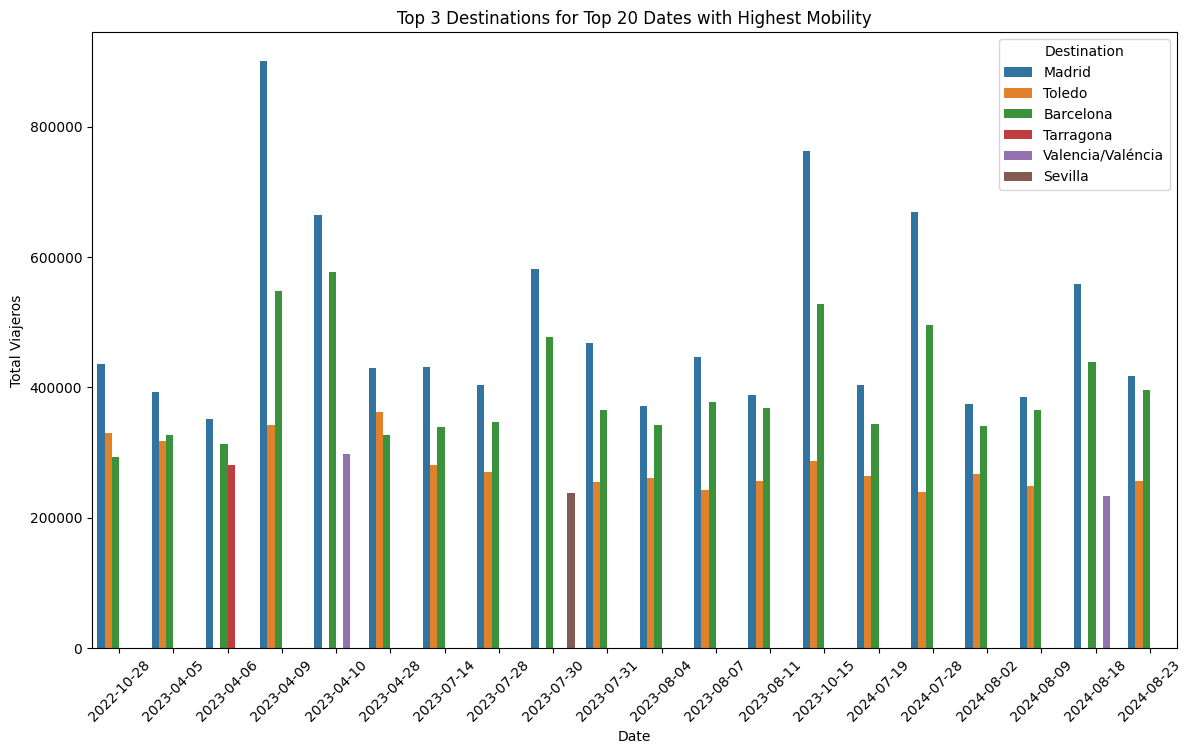

In [30]:
#group by date and destination to find the total num of travelers for each destination on the top dates
top_destinations = top_dates_data.groupby(['day', 'provincia_destino_name'])['viajeros'].sum().reset_index()

#for each top date, find top destination
top_destinations_per_date = top_destinations.sort_values(by=['day', 'viajeros'], ascending=[True, False]).groupby('day').head(3)

#prints
print("Top 3 destinations for top 20 dates with highest mobility:")
print(top_destinations_per_date)

plt.figure(figsize=(14, 8))
sns.barplot(x='day', y='viajeros', hue='provincia_destino_name', data=top_destinations_per_date)
plt.title('Top 3 Destinations for Top 20 Dates with Highest Mobility')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=45)
plt.legend(title='Destination')
plt.show()

To focus on the mobility between the peninsula and the islands during specific periods (summer, Christmas, Easter, and regional holidays), and to make predictions about the number of people entering or leaving the islands, we can follow these steps:

Filter the data for the relevant periods and locations.
Analyze the mobility patterns during these periods.
Build a predictive model to forecast the number of travelers.

In [47]:
# Print unique province names
print("Unique province names (origin):")
print(df_all['provincia_origen_name'].unique())

print("Unique province names (destination):")
print(df_all['provincia_destino_name'].unique())

Unique province names (origin):
['Albacete' 'Alicante' 'Almería' 'Araba/Álava' 'Asturias' 'Badajoz'
 'Balears, Illes' 'Barcelona' 'Bizkaia' 'Burgos' 'Cantabria'
 'Castellón/Castelló' 'Ceuta' 'Ciudad Real' 'Coruña, A' 'Cuenca' 'Cáceres'
 'Cádiz' 'Córdoba' 'Gipuzkoa' 'Girona' 'Granada' 'Guadalajara' 'Huelva'
 'Huesca' 'Jaén' 'León' 'Lleida' 'Lugo' 'Madrid' 'Melilla' 'Murcia'
 'Málaga' 'Navarra' 'Ourense' 'Palencia' 'Palmas, Las' 'Pontevedra'
 'Rioja, La' 'Salamanca' 'Santa Cruz de Tenerife' 'Segovia' 'Sevilla'
 'Soria' 'Tarragona' 'Teruel' 'Toledo' 'Valencia/Valéncia' 'Valladolid'
 'Zamora' 'Zaragoza' 'Ávila']
Unique province names (destination):
['Alicante' 'Almería' 'Badajoz' 'Balears, Illes' 'Barcelona' 'Burgos'
 'Cantabria' 'Castellón/Castelló' 'Ciudad Real' 'Cuenca' 'Cáceres' 'Cádiz'
 'Córdoba' 'Gipuzkoa' 'Girona' 'Granada' 'Guadalajara' 'Huelva' 'Jaén'
 'León' 'Lugo' 'Madrid' 'Murcia' 'Málaga' 'Navarra' 'Palmas, Las'
 'Santa Cruz de Tenerife' 'Segovia' 'Sevilla' 'Tarragona' 'Teruel

In [52]:
# Define the periods of interest
summer_period = ((df_all['day'].dt.month >= 6) & (df_all['day'].dt.month <= 8))
christmas_period = ((df_all['day'].dt.month == 12) | (df_all['day'].dt.month == 1))
easter_period = ((df_all['day'].dt.month == 3) | (df_all['day'].dt.month == 4))
regional_holidays = ['2022-12-24', '2022-01-01', '2022-10-12', '2022-01-06', '2022-06-23', 
                     '2023-12-24', '2023-01-01', '2023-10-12', '2023-01-06', '2023-06-23', 
                     '2024-12-24', '2024-01-01', '2024-10-12', '2024-01-06', '2024-06-23'] 

# Convert regional holidays to datetime
regional_holidays = pd.to_datetime(regional_holidays)

# Filter data for the periods of interest
#df_filtered = df_all[summer_period | christmas_period | easter_period | df_all['day'].isin(regional_holidays)]
#Regional Holidays!
df_filtered = df_all[df_all['day'].isin(regional_holidays)]

# Define the list of provinces for peninsula and islands based on the unique values printed earlier
peninsula_provinces = ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Zaragoza']  # Example list of peninsula provinces
island_provinces = ['Balears, Illes', 'Palmas, Las', 'Santa Cruz de Tenerife']  # Example list of island provinces

# Filter for mobility between peninsula and islands
df_filtered = df_filtered[(df_filtered['provincia_origen_name'].isin(peninsula_provinces) & df_filtered['provincia_destino_name'].isin(island_provinces)) |
                          (df_filtered['provincia_origen_name'].isin(island_provinces) & df_filtered['provincia_destino_name'].isin(peninsula_provinces))]

print("Filtered Data:")
print(df_filtered.head())

Filtered Data:
       viajeros  viajes  provincia_origen provincia_origen_name  \
73912      6936    7010                 7        Balears, Illes   
73926      3379    3464                 7        Balears, Illes   
73936       419     452                 7        Balears, Illes   
73942       421     439                 7        Balears, Illes   
73949      5478    5550                 8             Barcelona   

       provincia_destino provincia_destino_name        day  
73912                  8              Barcelona 2022-10-12  
73926                 28                 Madrid 2022-10-12  
73936                 41                Sevilla 2022-10-12  
73942                 50               Zaragoza 2022-10-12  
73949                  7         Balears, Illes 2022-10-12  


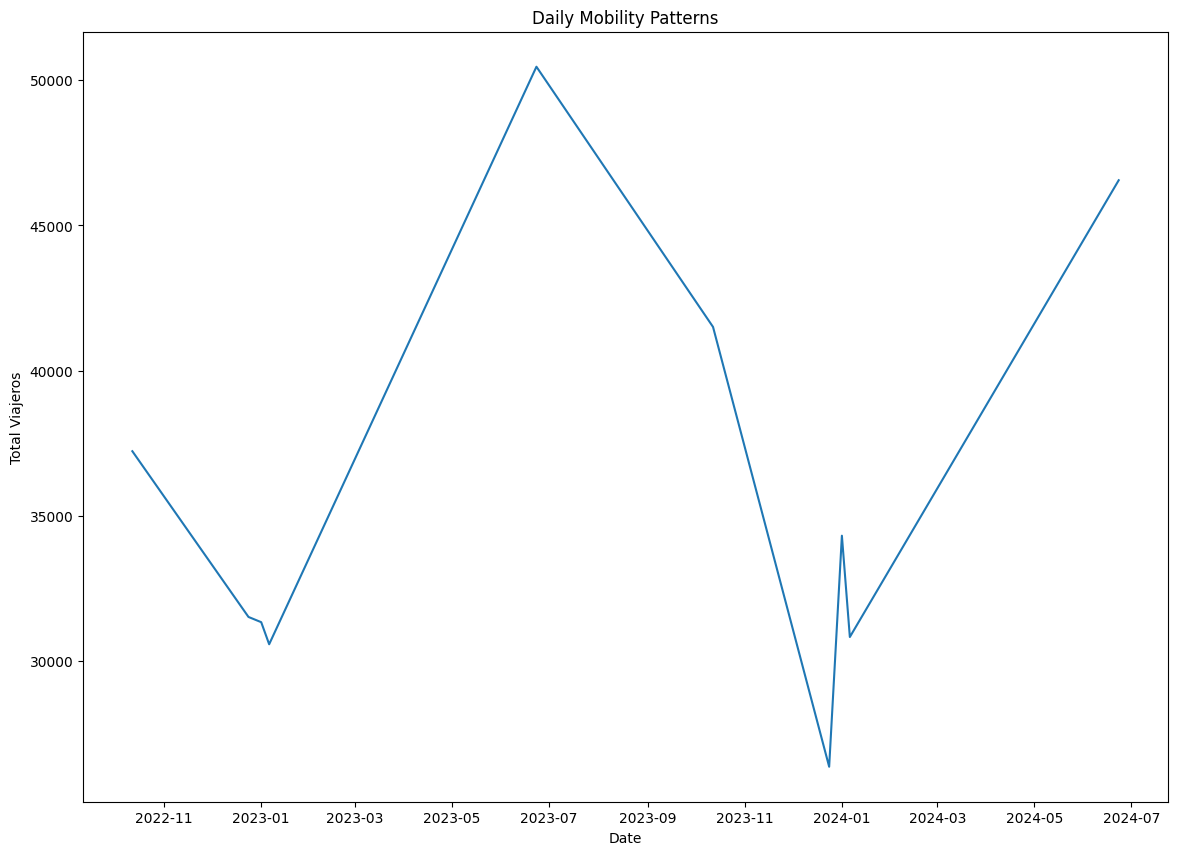

Top destinations for the top mobility dates:
          day provincia_destino_name  viajeros
0  2022-10-12         Balears, Illes      8893
1  2022-10-12              Barcelona      8691
2  2022-10-12                 Madrid      7816
7  2022-12-24         Balears, Illes      7704
8  2022-12-24              Barcelona      7445
9  2022-12-24                 Madrid      6276
14 2023-01-01         Balears, Illes      7686
16 2023-01-01                 Madrid      6846
15 2023-01-01              Barcelona      6401
23 2023-01-06                 Madrid      7951
21 2023-01-06         Balears, Illes      7562
22 2023-01-06              Barcelona      7403
28 2023-06-23         Balears, Illes     19931
29 2023-06-23              Barcelona     11559
30 2023-06-23                 Madrid      8583
35 2023-10-12         Balears, Illes     13601
36 2023-10-12              Barcelona      8790
37 2023-10-12                 Madrid      8356
42 2023-12-24         Balears, Illes      6024
43 2023-12-24  

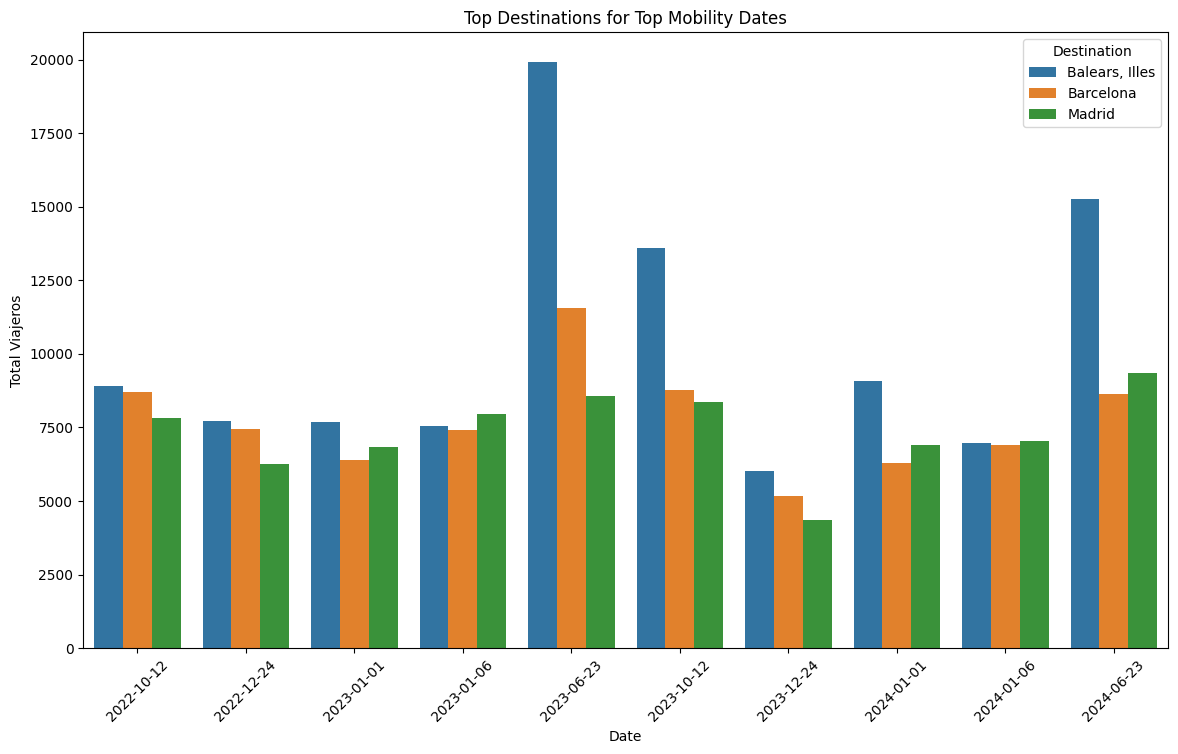

In [55]:
# Aggregate data to find total number of travelers for each date
daily_mobility = df_filtered.groupby('day')['viajeros'].sum().reset_index()

# Plot the mobility patterns
plt.figure(figsize=(14, 10))
sns.lineplot(x='day', y='viajeros', data=daily_mobility)
plt.title('Daily Mobility Patterns')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=0)
plt.show()

# Group by date and destination to find the total number of travelers for each destination on the top dates
top_destinations = df_filtered.groupby(['day', 'provincia_destino_name'])['viajeros'].sum().reset_index()

# For each top date, find the top 3 destinations
top_destinations_per_date = top_destinations.sort_values(by=['day', 'viajeros'], ascending=[True, False]).groupby('day').head(3)

print("Top destinations for the top mobility dates:")
print(top_destinations_per_date)

# Plot top destinations for top mobility dates
plt.figure(figsize=(14, 8))
sns.barplot(x='day', y='viajeros', hue='provincia_destino_name', data=top_destinations_per_date)
plt.title('Top Destinations for Top Mobility Dates')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=45)
plt.legend(title='Destination')
plt.show()